# Imports

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.io import imread
import re
import os

# Importing the data

In [ ]:
drive.mount('/content/drive')
faces_path = '/content/drive/MyDrive/faces_dataset'

Mounted at /content/drive


# Sorting Labels

In [ ]:
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)    

# Getting No of Files and Directories

In [ ]:
totalDir = 0
totalFiles = 0
for base, dirs, files in os.walk(faces_path):
    #print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for noOfFiles in files:
        totalFiles += 1
print(totalDir)  
print(totalFiles)      
entries = os.listdir(faces_path)
entriesNP = sorted_alphanumeric(np.array(entries))
print(entriesNP)
labels = []
counter = 0
for i in range(totalDir):
  counter+=1
  labels.append(counter)



40
400
['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's39', 's40']


# Computing Data Matrix

In [ ]:
def readpgm(noOfSubjects,noOfImages):
  datamatrix = []
  for i in range(1,noOfSubjects+1):
    for j in range(1,noOfImages+1):
      image = imread(faces_path + "/s{0}/{1}.pgm".format(i,j))
      image = image.transpose()
      image = np.ravel(image)
      datamatrix.append(image)
  datamatrix = np.array(datamatrix)    
  return datamatrix

In [ ]:
datamatrix = readpgm(totalDir,int(totalFiles / totalDir))

Define Const

In [ ]:
MAX_COLS = 10304
NEIGHBORS = [1,3,5,7]

# Adding Labels Vector to the data matrix

In [ ]:
labelsVector = []
for i in range(totalDir):
  for j in range(int(totalFiles/totalDir)):
    labelsVector.append(labels[i])

num_rows, num_cols = datamatrix.shape



# Making Data Frame
don't know if we gonna need it or not but just for visualizing the dataset
******** Don't run the code because I deleted the labels vector from the data matrix *********

In [ ]:
dimensions = []
indexes = []
for i in range(1,num_cols):
  dimensions.append('p{0}'.format(i))
dimensions.append('y')  
print(dimensions)
for j in range(1,num_rows+1):
  indexes.append(j)
print(indexes)    
df = pd.DataFrame(data = datamatrix, index = indexes, columns = dimensions)
print(df)

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p130', 'p131', 'p132', 'p133', 'p134', 'p135', 'p136', 'p137', 'p138', 'p1

# Splitting the dataset into training and testing sets

In [ ]:
trainingMatrix = np.empty((0,num_cols),int)
trainingLabels = []
testingMatrix = np.empty((0,num_cols),int)
testingLabels = []
for i in range(num_rows):
  if (i % 2) ==0:
    testingMatrix = np.row_stack((testingMatrix, datamatrix[i]))
    testingLabels.append(labelsVector[i])
  else:
    trainingMatrix = np.row_stack((trainingMatrix, datamatrix[i]))
    trainingLabels.append(labelsVector[i])  

# PCA

## Computing the mean

In [ ]:
def calc_mean(mat):
  u = sum(mat[:]) / len(mat)
  return u

## Center the data

In [ ]:
def center_mat(mat, u):
  z = mat - u;
  return z

## Compute Covariance Matrix

In [ ]:
def compute_cov(mat, n):
  mat_trans = mat.transpose()
  cov = (np.dot(mat_trans,mat))/(n)
  return cov

## Computing Eigen Vectors and Values

In [ ]:
def compute_eig(mat):
  return np.linalg.eigh(mat)

## Computing fraction of total variance

In [ ]:
def calculate_fr(ev):
  fr = [];
  # RETHINK THE ABS
  eigenValues = ev + abs(ev[0])
  sum_of_eigen_values = np.sum(eigenValues);
  for i in range(eigenValues.size):
    r = (sum_of_eigen_values - sum(eigenValues[0 : i]))/sum_of_eigen_values
    fr.append(r)
  return fr

### Compute number of dimensions R

In [ ]:
def r_dim(alpha, f_r, MAX_COLS):
  i = 0
  while f_r[i] > alpha:
    i += 1
  
  return MAX_COLS - (i - 1)

### Define computating projection matrix function

In [ ]:
def get_proj_mat(alpha, f_r, evectors, MAX_COLS):
  r = r_dim(alpha, f_r, MAX_COLS)
  U = evectors[:, MAX_COLS - r: MAX_COLS]
  return U

### Define Projection function

In [ ]:
def project_mat(data, projection_mat):
  A = []
  u_t = np.transpose(projection_mat)
  for row in data:
    x = np.matmul(u_t, row)
    A.append(x)
  
  return np.array(A)


## PCA Function

In [ ]:
def calc_pca(training_matrix, testing_matrix, alphas):
  mean = calc_mean(training_matrix)
  z = center_mat(training_matrix, mean)
  cov = compute_cov(z, training_matrix.shape[0])
  eigen_values, eigen_vectors = compute_eig(cov)
  fr = calculate_fr(eigen_values)

  A_trainings = []
  A_testings = []

  for i, alpha in enumerate(alphas):
    U = get_proj_mat(alpha, fr, eigen_vectors, training_matrix.shape[1])
    A_training = project_mat(training_matrix, U)
    A_testing = project_mat(testing_matrix, U)
    A_trainings.append(A_training)
    A_testings.append(A_testing)

  return [A_trainings, A_testings]

## Defining alphas

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]

## Define Classifier

### Define classifying function

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
  

def classify(train_mat, test_mat, training_labels, neighbors):
  knn = KNeighborsClassifier(n_neighbors=neighbors)
  knn.fit(train_mat, training_labels)
  return knn.predict(test_mat)


### Calculate accuracy

In [ ]:
def calc_accuracy(alphas, tr_labels, res_labels):
  acc_vec = []
  for i, result in enumerate(res_labels):
    acc = sum(1 for result,tr_labels in zip(result,tr_labels) if result == tr_labels) / len(tr_labels)
    acc_vec.append(acc)
    print(f'accuracy alpha {alphas[i]} = {acc}')
  return acc_vec

### Running function for the main data set, 50/50, all humans

In [ ]:
training_mats, testing_mats = calc_pca(trainingMatrix, testingMatrix, alphas)

### Classify the humans

In [ ]:

res_labels = []
for i, train_mat in enumerate(training_mats):
  res_label = classify(train_mat, testing_mats[i], trainingLabels, 1)
  print(f'alpha: {alphas[i]}: {res_label}')
  res_labels.append(res_label)
  print('-----------------------------------------------------')

alpha: 0.8: [16  2  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 20 21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 24
 25 25 25 25 25 26 26 26 26 26 27 27 27 27 27 28 28 28 28 28 29 29 29 29
 29 30 30 30 30 30 31 31 31 21 31 32 32 32  2 32 33 33 33 33 33 34 34 34
 34 34 40 15 35 35 35  7 36  7 36 36 37 37 37 37 37 38 38 38 38 38 39 39
 39 39 39 40 40  5  5  5]
-----------------------------------------------------
alpha: 0.85: [16 19  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4  4  5  5  5  5
  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9  9  9 10 10 10
 10 38 11 11 11 11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15
 15 15 15 16 16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 36 20
 20  3 20 20 21 21 

In [ ]:
acc_vec = calc_accuracy(alphas, trainingLabels,  res_labels)

accuracy alpha 0.8 = 0.93
accuracy alpha 0.85 = 0.94
accuracy alpha 0.9 = 0.945
accuracy alpha 0.95 = 0.935


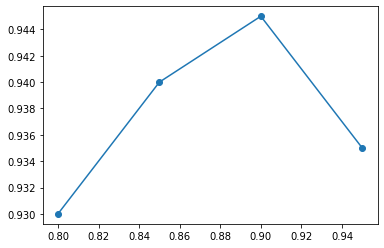

In [ ]:
plt.plot(alphas, acc_vec, marker = 'o')

## Plotting the accuracy according to neighbour increasing with alpha = 0.9

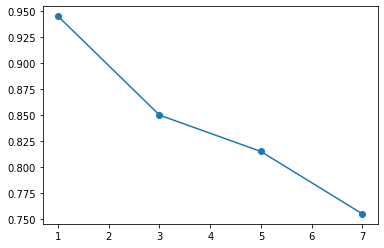

In [ ]:
accuracies_pca = []

for i, ni in enumerate(NEIGHBORS):
  lda_result_i = classify(training_mats[2], testing_mats[2], trainingLabels, ni)
  acc_lda_i = sum(1 for lda_result_i,trainingLabels in zip(lda_result_i,trainingLabels) if lda_result_i == trainingLabels) / len(trainingLabels)
  accuracies_pca.append(acc_lda_i)

plt.plot(NEIGHBORS, accuracies_pca, marker ='o')

---
# LDA

## Calculate mean for every class

In [ ]:
def class_means(D):
  means = []
  for data_class in D:
    m = np.mean(data_class, axis =0)
    means.append(m)
  return means

## Calculate between class scatter matrix

In [ ]:
def calc_sb(MAX_COLS, SAMPLES_IN_CLASS, NUMBER_OF_CLASSES, means, overall_mean):
  # K is the number of classes => 40
  # N is the number of samples in each class => 5

  Sb = np.empty([MAX_COLS, MAX_COLS])
  nk = SAMPLES_IN_CLASS

  for i in range(NUMBER_OF_CLASSES):
    h = np.array([means[i] - overall_mean])
    mm =  np.multiply(nk[i], np.dot(np.transpose(h), h))
    Sb = Sb + mm
  
  return Sb

## Calculate Centered Matrcies Z

In [ ]:
def calc_centered_matrcies(D, means):
  z_classes = []
  for i, data_class in enumerate(D):
    z_i = data_class - means[i]
    z_classes.append(z_i)
  return z_classes

## Calculate Class Scatter matrcies

In [ ]:
def calc_within_cls_mat(MAX_COLS, z_classes):
  S_classes = []

  S_C = np.empty([MAX_COLS, MAX_COLS])

  for z_i in z_classes:
    S_C = S_C + np.dot(np.transpose(z_i), z_i)
  
  return S_C

## Calculate Eigen values & vectors

In [ ]:
def calc_ev_lda(s_inv, Sb):
  hh = np.matmul(s_inv, Sb) 
  return np.linalg.eigh(hh)

## LDA function

In [ ]:
def calc_lda(train_mat, test_mat, D):
  means = class_means(D)
  overall_mean = np.mean(trainingMatrix, axis=0)
  rows = []
  for i in range(D.shape[0]):
    rows.append(D[i].shape[0])
  sb = calc_sb(D[0].shape[1], rows, D.shape[0], means, overall_mean)
  Z = calc_centered_matrcies(D, means)
  S = calc_within_cls_mat(D[0].shape[1],Z)
  s_inv = np.linalg.inv(S)
  eigvals, eigvectors = calc_ev_lda(s_inv, sb)
  dominants = 39
  p_lda = eigvectors[:, D[0].shape[1] - dominants: D[0].shape[1]]
  A_LDA_training = project_mat(train_mat, p_lda)
  A_LDA_testing = project_mat(test_mat, p_lda)
  return [A_LDA_training, A_LDA_testing]

## Calling the function

In [ ]:
D = trainingMatrix.reshape(40, 5, -1)
train_lda, test_lda = calc_lda(trainingMatrix, testingMatrix, D)

## Classify LDA with 1 neighbor

In [ ]:
lda_result = classify(train_lda, test_lda, trainingLabels, 1)

## Calculate accuracy for diff neighbors

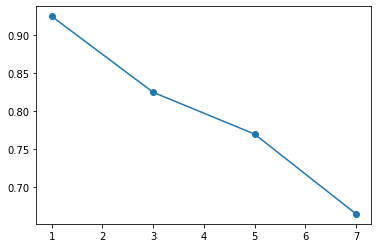

In [ ]:
accuracies_lda = []

for i, ni in enumerate(NEIGHBORS):
  lda_result_i = classify(train_lda, test_lda, trainingLabels, ni)
  acc_lda_i = sum(1 for lda_result_i,trainingLabels in zip(lda_result_i,trainingLabels) if lda_result_i == trainingLabels) / len(trainingLabels)
  accuracies_lda.append(acc_lda_i)

plt.plot(NEIGHBORS, accuracies_lda, marker ='o')

In [ ]:
accuracies_lda

[0.925, 0.825, 0.77, 0.665]

In [ ]:
def plot_PCA_LDA(NEIGHBORS,accuracies_lda,accuracies_pca):
  x = np.linspace(0, 10, 100)
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.set_xlabel('Neihgbors')
  ax.set_ylabel('Accuracy')
  plt.plot(NEIGHBORS,accuracies_lda, '-' ,marker = 'o', label = 'LDA')
  plt.plot(NEIGHBORS,accuracies_pca, '--' , marker = 'o', label = 'PCA')

  plt.legend()

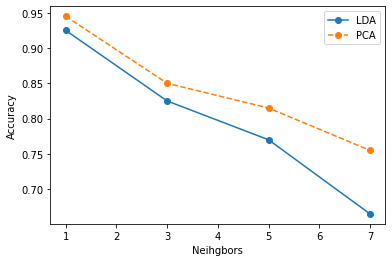

In [ ]:
plot_PCA_LDA(NEIGHBORS, accuracies_lda, accuracies_pca)

---
# Non-face Images

## Reading Non face images

In [ ]:
def readNonFacesImages(noOfImages):
  datamatrix = []
  for i in range(1,noOfImages+1):
      image = imread("/content/drive/MyDrive/Non faces/image ({0}).jpg".format(i))
      #image = image.transpose()
      image = np.ravel(image)
      datamatrix.append(image)
  datamatrix = np.array(datamatrix)    
  return datamatrix

## Scaling and Converting to grayscale

In [ ]:
totalDir = 0
totalFiles = 0
for base, dirs, files in os.walk('/content/drive/MyDrive/Non faces'):
    #print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for noOfFiles in files:
        totalFiles += 1
nonFacesMatrix = readNonFacesImages(totalFiles)

## Splitting the Non-faces

In [ ]:
totalFiles

400

In [ ]:
nonfaces_training_labels = np.zeros(200, dtype=int)
nonfaces_testing_labels = np.zeros(200, dtype=int)

faces_training_labels = np.ones(200, dtype=int)
faces_testing_labels = np.ones(200, dtype=int)

nonfaces_training_matrix = np.empty((0,nonFacesMatrix.shape[1]))
nonfaces_testing_matrix = np.empty((0,nonFacesMatrix.shape[1]))

for i in range(nonFacesMatrix.shape[0]):
  if (i % 2) ==0:
    nonfaces_testing_matrix = np.row_stack((nonfaces_testing_matrix, nonFacesMatrix[i]))
  else:
    nonfaces_training_matrix = np.row_stack((nonfaces_training_matrix, nonFacesMatrix[i]))

fnf_training_matrix = np.array([*nonfaces_training_matrix , *trainingMatrix ])
fnf_testing_matrix = np.array([*nonfaces_testing_matrix , *testingMatrix ])
fnf_training_labels = np.array([*nonfaces_training_labels, *faces_training_labels])
fnf_testing_labels = np.array([*nonfaces_testing_labels, *faces_testing_labels])

## Dimensionality Reduction using PCA

In [ ]:
fnf_training_mats, fnf_testing_mats = calc_pca(fnf_training_matrix, fnf_testing_matrix, alphas)

## Calculating Accuracy

In [ ]:
fnf_res_labels = []
for i, train_mat in enumerate(fnf_training_mats):
  res_label = classify(train_mat, fnf_testing_mats[i], fnf_training_labels, 1)
  print(f'alpha: {alphas[i]}: {res_label}')
  fnf_res_labels.append(res_label)
  print('-----------------------------------------------------')

alpha: 0.8: [1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
-----------------------------------------------------
alpha: 0.85: [1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 

In [ ]:
fnf_acc_vec = calc_accuracy(alphas, fnf_testing_labels,  fnf_res_labels)

accuracy alpha 0.8 = 0.9133333333333333
accuracy alpha 0.85 = 0.8933333333333333
accuracy alpha 0.9 = 0.8833333333333333
accuracy alpha 0.95 = 0.8733333333333333


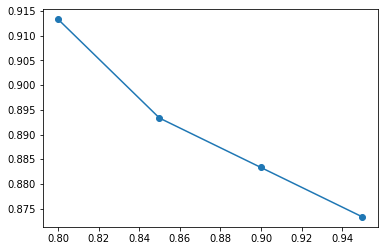

In [ ]:
plt.plot(alphas, fnf_acc_vec, marker = 'o')

## Dimensionality Reduction using LDA with 39 dominant eigen vectors

In [ ]:
D_fnf = np.array([nonfaces_training_matrix, trainingMatrix])
fnf_train_lda, fnf_test_lda = calc_lda(fnf_training_matrix, fnf_testing_matrix, D_fnf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
fnf_lda_result = classify(fnf_train_lda, fnf_test_lda, fnf_training_labels, 1)

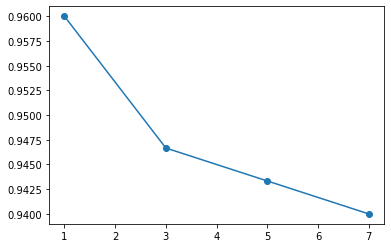

In [ ]:
fnf_accuracies_lda = []

for i, ni in enumerate(NEIGHBORS):
  lda_result_i = classify(fnf_train_lda, fnf_test_lda, fnf_testing_labels, ni)
  acc_lda_i = sum(1 for lda_result_i,fnf_testing_labels in zip(lda_result_i,fnf_testing_labels) if lda_result_i == fnf_testing_labels) / len(fnf_testing_labels)
  fnf_accuracies_lda.append(acc_lda_i)

plt.plot(NEIGHBORS, fnf_accuracies_lda, marker ='o')

In [ ]:
fnf_accuracies_lda

[0.96, 0.9466666666666667, 0.9433333333333334, 0.94]

## Plotting PCA vs LDA

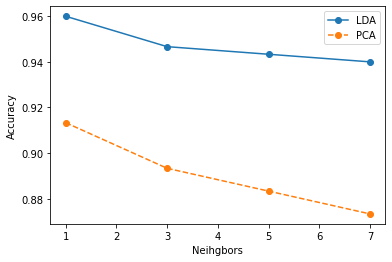

In [ ]:
plot_PCA_LDA(NEIGHBORS, fnf_accuracies_lda, fnf_acc_vec)

---
# 30 - 70%

In [ ]:
trainingMatrix70 = np.empty((0,num_cols),int)
trainingLabels70 = []
testingMatrix30 = np.empty((0,num_cols),int)
testingLabels30 = []
counter = 0
for i in range(num_rows):
  if (counter<=6):
    trainingMatrix70 = np.row_stack((trainingMatrix70, datamatrix[i]))
    trainingLabels70.append(labelsVector[i])
  elif(counter>6 and counter <10):
    testingMatrix30 = np.row_stack((testingMatrix30, datamatrix[i]))
    testingLabels30.append(labelsVector[i])
    if (counter == 9): counter = -1

  counter += 1

print(trainingLabels70)

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38

## PCA

In [ ]:
training_mats70, testing_mats30 = calc_pca(trainingMatrix70, testingMatrix30, alphas)

### Calculating Accuracies

In [ ]:
res_labels70 = []
for i, train_mat in enumerate(training_mats70):
  res_label = classify(train_mat, testing_mats30[i], trainingLabels70, 1)
  print(f'alpha: {alphas[i]}: {res_label}')
  res_labels70.append(res_label)
  print('-----------------------------------------------------')

alpha: 0.8: [ 1  1  1  2  2  2  3  3  3  4  4  4  5  5 40  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 38 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 27 19 20 20 20 21 21 21 22 22 22 23 38 23 24 24 24
 25 25 25 26 26 26 27 27 27 37 28 28 29 29 29 30 30 30 31 31 31 32 32 32
 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39 40 40 40]
-----------------------------------------------------
alpha: 0.85: [ 1  1  1  2  2  2  3  3  3  4  4  4  5  5 40  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 38 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16 16
 17 17 17 18 18 18 19 15 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26 27 27 27 37 28 28 29 29 29 30 30 30 31 31 31 32 32 32
 33 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39 40 40 40]
-----------------------------------------------------
alpha: 0.9: [ 1  1  1  2  2  2  3  3  3  4  4  4  5  5 40  6  6  6  7  7  7  8  8  8
  9  9  9 10 10 38 11 11 11 12 12 12 13 13 13 14 1

In [ ]:
acc_vec_70 = calc_accuracy(alphas, testingLabels30,  res_labels70)

accuracy alpha 0.8 = 0.9583333333333334
accuracy alpha 0.85 = 0.9666666666666667
accuracy alpha 0.9 = 0.9666666666666667
accuracy alpha 0.95 = 0.95


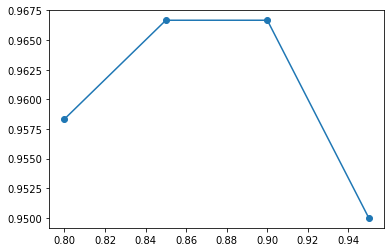

In [ ]:
plt.plot(alphas, acc_vec_70, marker = 'o')

## LDA

In [ ]:
D_70 = trainingMatrix70.reshape(40, 7, -1)
train_lda_70, test_lda_70 = calc_lda(trainingMatrix70, testingMatrix30, D_70)

### Getting the accuracy

In [ ]:
lda_result70 = classify(train_lda_70, test_lda_70, trainingLabels70, 1)

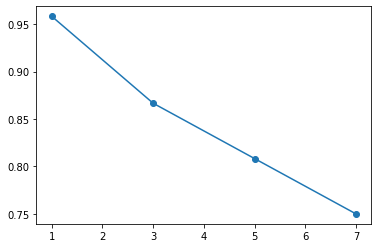

In [ ]:
accuracies_lda70 = []

for i, ni in enumerate(NEIGHBORS):
  lda_result_i = classify(train_lda_70, test_lda_70, trainingLabels70, ni)
  acc_lda_i = sum(1 for lda_result_i,testingLabels30 in zip(lda_result_i,testingLabels30) if lda_result_i == testingLabels30) / len(testingLabels30)
  accuracies_lda70.append(acc_lda_i)

plt.plot(NEIGHBORS, accuracies_lda70, marker ='o')

In [ ]:
accuracies_lda70

[0.8916666666666667, 0.7583333333333333, 0.7166666666666667, 0.7]

## Comparing with 50% splitting

### Comparing PCA

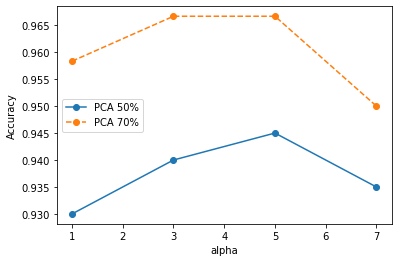

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
plt.plot(NEIGHBORS,acc_vec, '-' ,marker = 'o', label = 'PCA 50%')
plt.plot(NEIGHBORS,acc_vec_70, '--' , marker = 'o', label = 'PCA 70%')

plt.legend()

### Comparing LDA

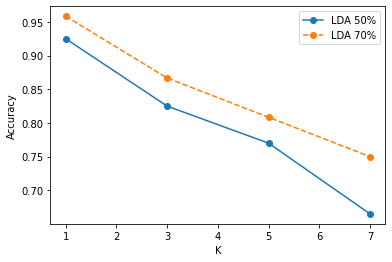

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('K')
ax.set_ylabel('Accuracy')
plt.plot(NEIGHBORS,accuracies_lda, '-' ,marker = 'o', label = 'LDA 50%')
plt.plot(NEIGHBORS,accuracies_lda70, '--' , marker = 'o', label = 'LDA 70%')

plt.legend()

---
# 

In [ ]:
def calc_classify_pca(trainingMatrix, testingMatrix, trainingLabels, testingLabels):
    alphas = [0.9]
    training_mats, testing_mats = calc_pca(trainingMatrix, testingMatrix, alphas)
    result = classify(training_mats[0], testing_mats[0], trainingLabels, 1)
    acc = sum(1 for result,testingLabels in zip(result,testingLabels) if result == testingLabels) / len(testingLabels)
    return acc

In [ ]:
def calc_acc_lda(training_mat, test_mat, D, trainingLabels, testingLabels):
    train_lda, test_lda = calc_lda(training_mat, test_mat, D)
    lda_result_i = classify(train_lda, test_lda, trainingLabels, 1)
    acc = sum(1 for lda_result_i,testingLabels in zip(lda_result_i,testingLabels) if lda_result_i == testingLabels) / len(testingLabels)
    return acc

In [ ]:
nonfaces_training_labels50 = np.zeros(50, dtype=int)
nonfaces_training_labels100 = np.zeros(100, dtype=int)
nonfaces_training_labels150 = np.zeros(150, dtype=int)
nonfaces_training_labels200 = np.zeros(200, dtype=int)
nonfaces_testing_labels100 = np.zeros(100, dtype=int)


#splitting Non-faces

In [ ]:
def getNonFacesSplits(nonfaces_training_matrix):
  
  
  num_rows, num_cols = nonfaces_training_matrix.shape
  counter = 0
  for i in range(num_rows):
    if(counter<=49):
      nonfaces_training_matrix50 = np.row_stack((nonfaces_training_matrix50, nonfaces_training_matrix[i]))
    if(counter<=99):
      nonfaces_training_matrix100 = np.row_stack((nonfaces_training_matrix100, nonfaces_training_matrix[i]))
    if(counter<=149):
      nonfaces_training_matrix150 = np.row_stack((nonfaces_training_matrix150, nonfaces_training_matrix[i]))
    if(counter<=199):
      nonfaces_training_matrix200 = np.row_stack((nonfaces_training_matrix200, nonfaces_training_matrix[i]))
    counter+=1
  print(nonfaces_training_matrix50.shape)
  print(nonfaces_training_matrix100.shape)
  print(nonfaces_training_matrix150.shape)
  print(nonfaces_training_matrix200.shape)

  return nonfaces_training_matrix50,nonfaces_training_matrix100,nonfaces_training_matrix150,nonfaces_training_matrix200

#call

In [ ]:
nonfaces_training_matrix50 = np.empty((0,nonfaces_training_matrix.shape[1]))
nonfaces_training_matrix100 = np.empty((0,nonfaces_training_matrix.shape[1]))
nonfaces_training_matrix150 = np.empty((0,nonfaces_training_matrix.shape[1]))
nonfaces_training_matrix200 = np.empty((0,nonfaces_training_matrix.shape[1]))

nonfaces_training_matrix50,nonfaces_training_matrix100,nonfaces_training_matrix150,nonfaces_training_matrix200 = getNonFacesSplits(nonfaces_training_matrix)

(50, 10304)
(100, 10304)
(150, 10304)
(200, 10304)


In [ ]:
acc50 = calc_classify_pca(np.concatenate((trainingMatrix,nonfaces_training_matrix50)),np.concatenate((testingMatrix,nonfaces_testing_matrix[0:100])),np.append(trainingLabels,nonfaces_training_labels50),np.append(testingLabels,nonfaces_testing_labels100))
acc100 = calc_classify_pca(np.concatenate((trainingMatrix,nonfaces_training_matrix100)),np.concatenate((testingMatrix,nonfaces_testing_matrix[0:100])),np.append(trainingLabels,nonfaces_training_labels100),np.append(testingLabels,nonfaces_testing_labels100))
acc150 = calc_classify_pca(np.concatenate((trainingMatrix,nonfaces_training_matrix150)),np.concatenate((testingMatrix,nonfaces_testing_matrix[0:100])),np.append(trainingLabels,nonfaces_training_labels150),np.append(testingLabels,nonfaces_testing_labels100))
acc200 = calc_classify_pca(np.concatenate((trainingMatrix,nonfaces_training_matrix200)),np.concatenate((testingMatrix,nonfaces_testing_matrix[0:100])),np.append(trainingLabels,nonfaces_training_labels200),np.append(testingLabels,nonfaces_testing_labels100))

In [ ]:
print(acc50)
print(acc100)
print(acc150)
print(acc200)

0.8133333333333334
0.8433333333333334
0.88
0.9033333333333333


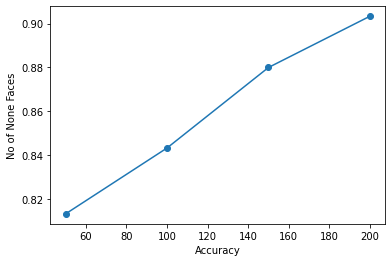

In [ ]:
accFacesNonFaces = [acc50,acc100,acc150,acc200]
x = [50,100,150,200]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Accuracy')
ax.set_ylabel('No of None Faces')
plt.plot(x,accFacesNonFaces, '-' ,marker = 'o')

In [ ]:
print(np.concatenate((trainingMatrix,nonfaces_training_matrix50)))

[[ 60.  58.  68. ...  33.  31.  34.]
 [ 63.  56.  52. ...  25.  28.  24.]
 [ 43.  45.  57. ... 175. 174. 169.]
 ...
 [ 35.  28.  86. ...  78.  73.  64.]
 [ 81. 117. 152. ... 252. 252. 249.]
 [169. 169. 170. ...  12.  14.  17.]]
